In [2]:
import numpy as np 
import pandas as pd 

import sqlite3 as sql 

import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_match_basic = pd.read_csv("../data/df_match_basic.csv")
df_match_basic

,match_api_id,country_id,league_id,season,stage,match_date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_result
0,492473,1,1,2008/2009,1,2008-08-17,9987,9993,1,1,draw
1,492474,1,1,2008/2009,1,2008-08-16,10000,9994,0,0,draw
2,492475,1,1,2008/2009,1,2008-08-16,9984,8635,0,3,away_win
3,492476,1,1,2008/2009,1,2008-08-17,9991,9998,5,0,home_win
4,492477,1,1,2008/2009,1,2008-08-16,7947,9985,1,3,away_win
...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,24558,24558,2015/2016,9,2015-09-22,10190,10191,1,0,home_win
25975,1992092,24558,24558,2015/2016,9,2015-09-23,9824,10199,1,2,away_win
25976,1992093,24558,24558,2015/2016,9,2015-09-23,9956,10179,2,0,home_win
25977,1992094,24558,24558,2015/2016,9,2015-09-22,7896,10243,0,0,draw


- There are total 25,979 matches.

- Change the country_id and league_id to the country and league name.

In [6]:
con = sql.connect("../data/database.sqlite")

In [7]:
org_country = pd.read_sql(
    "select * from Country", con
    )

org_league = pd.read_sql(
    "select * from League", con
    )


In [10]:
org_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [15]:
df_match_basic

,match_api_id,country_id,league_id,season,stage,match_date,home_team_api_id,away_team_api_id
0,492473,1,1,2008/2009,1,2008-08-17,9987,9993
1,492474,1,1,2008/2009,1,2008-08-16,10000,9994
2,492475,1,1,2008/2009,1,2008-08-16,9984,8635
3,492476,1,1,2008/2009,1,2008-08-17,9991,9998
4,492477,1,1,2008/2009,1,2008-08-16,7947,9985
...,...,...,...,...,...,...,...,...
25974,1992091,24558,24558,2015/2016,9,2015-09-22,10190,10191
25975,1992092,24558,24558,2015/2016,9,2015-09-23,9824,10199
25976,1992093,24558,24558,2015/2016,9,2015-09-23,9956,10179
25977,1992094,24558,24558,2015/2016,9,2015-09-22,7896,10243


In [19]:
df_match_basic = df_match_basic.merge(org_country, how = "left", left_on = "country_id", right_on = "id") \
                     .rename(columns = {"name": "country_name"}).drop(["id"], axis = 1) \
                     .merge(org_league, how = "left", on = "country_id") \
                     .rename(columns = {"name": "league_name"}).drop(["id", "country_id", "league_id"], axis = 1) \
                    [["match_api_id", "country_name", "league_name", "season", "stage", "match_date", "home_team_api_id", "away_team_api_id"]]

In [20]:
df_match_basic

,match_api_id,country_name,league_name,season,stage,match_date,home_team_api_id,away_team_api_id
0,492473,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,9987,9993
1,492474,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,10000,9994
2,492475,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,9984,8635
3,492476,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,9991,9998
4,492477,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,7947,9985
...,...,...,...,...,...,...,...,...
25974,1992091,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22,10190,10191
25975,1992092,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23,9824,10199
25976,1992093,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23,9956,10179
25977,1992094,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22,7896,10243


In [44]:
df_match_basic.isna().sum()

match_api_id        0
country_name        0
league_name         0
season              0
stage               0
match_date          0
home_team_api_id    0
away_team_api_id    0
dtype: int64

- There is no missing value in the match basic information.

In [24]:
df_match_basic.groupby(["country_name"]).league_name.nunique()

country_name
Belgium        1
England        1
France         1
Germany        1
Italy          1
Netherlands    1
Poland         1
Portugal       1
Scotland       1
Spain          1
Switzerland    1
Name: league_name, dtype: int64

- There is only one league from each country.

In [26]:
df_match_basic.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [22]:
df_match_basic.groupby(["country_name", "league_name"]).season.nunique()

country_name  league_name             
Belgium       Belgium Jupiler League      8
England       England Premier League      8
France        France Ligue 1              8
Germany       Germany 1. Bundesliga       8
Italy         Italy Serie A               8
Netherlands   Netherlands Eredivisie      8
Poland        Poland Ekstraklasa          8
Portugal      Portugal Liga ZON Sagres    8
Scotland      Scotland Premier League     8
Spain         Spain LIGA BBVA             8
Switzerland   Switzerland Super League    8
Name: season, dtype: int64

- There are 8 seasons (2008/2009 ~ 2015/2016 seasons) from each league.

Text(0.5, 1.0, '8 Seasons: 2008/2009 ~ 2015/2016')

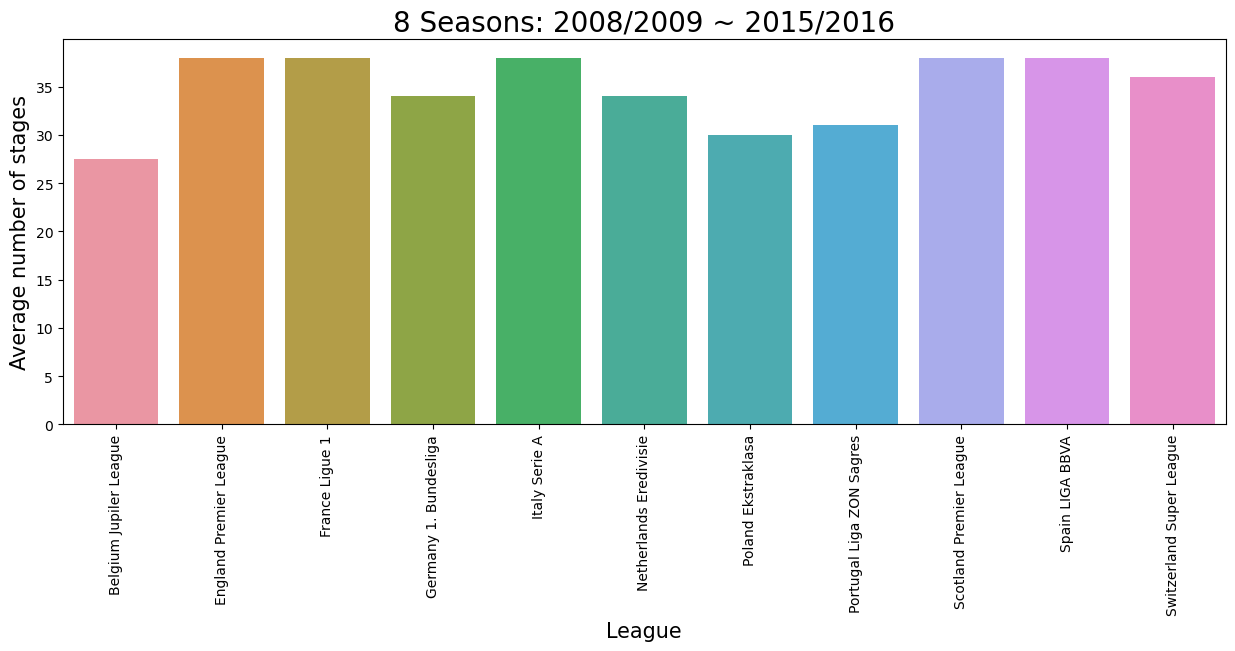

In [29]:
plt.figure(figsize = (15, 5))
sns.barplot(df_match_basic.groupby(["league_name", "season"]).stage.nunique().reset_index().groupby(["league_name"]).stage.mean().reset_index(),
            x = "league_name", y = "stage")
plt.ylabel("Average number of stages", fontsize = 15)
plt.xlabel("League", fontsize = 15)
plt.xticks(rotation=90)
plt.title("8 Seasons: 2008/2009 ~ 2015/2016", fontsize = 20)

- Above bar graph shows the average number of stages for 8 seasons from each league.
- Each league has average 25 ~ 40 stages.

- <font color="magenta">**Note**: Since matches are time-series data, it is not a good idea to randomly split train-test data set. So I decided to set the last 2015/2016 season as our test data and all other seasons as our train data. </font> 

In [36]:
df_match_basic[df_match_basic.season == "2015/2016"].match_api_id

1488     1979832
1489     1979833
1490     1979834
1491     1979835
1492     1979836
          ...   
25974    1992091
25975    1992092
25976    1992093
25977    1992094
25978    1992095
Name: match_api_id, Length: 3326, dtype: int64

In [37]:
df_match_basic[~(df_match_basic.season == "2015/2016")].match_api_id

0         492473
1         492474
2         492475
3         492476
4         492477
          ...   
25794    1717254
25795    1717255
25796    1717256
25797    1717257
25798    1717258
Name: match_api_id, Length: 22653, dtype: int64

- There are 22,653 (87%) matches in the train set
- There are 3,326 (13%) matches in the test set

- Let's save the train and test match_api_id.

In [45]:
df_match_basic[df_match_basic.season == "2015/2016"].match_api_id.to_csv("../data/test_match_api_id.csv", index = False)
df_match_basic[~(df_match_basic.season == "2015/2016")].match_api_id.to_csv("../data/train_match_api_id.csv", index = False)

### <font color="magenta">Summary</font>

- Since matches are time-series data, it is not a good idea to randomly split train-test data set. So I decided to set the last 2015/2016 season as our test data and all other seasons as our train data.
- The number of matches from the train data: 22,653 (87%) matches.
- The number of matches from the test data: 3,326 (13%) matches.